# DMD
## Overview
Let $X\in \mathbf{R}^{M\times N}$ be a data matrix. 
- Each column of $X$ is a snapshot of the system.
- Each row of $X$ is a time series of a single variable.  
We consider several snapshots, denoted as $X_{i_1}^{i_2} = [\mathbf{x}_{i_1}, \mathbf{x}_{i_1+1}, \ldots, \mathbf{x}_{i_2}]$. The full snapshot matrix is $X = X_{1}^{N}=[\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_{N}]$. The full snapshot matrix is $X = X_{1}^{N}=[\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_{N}]$, where each $\mathbf{x}_i=\mathbf{x}(t_i)\in \mathbf{R}^{M}$, is a snapshot of the system at time $t_i =t_1+(i-1)\Delta t $.  

## Assumption of DMD
The standard **DMD** relies on the assumption:
$$\mathbf{x}_{i+1} = A\mathbf{x}_i$$
$$\Leftrightarrow  X_{2}^{N} = AX_{1}^{N-1}$$
where $A$ is a linear operator.
If $A$ is known, and has eigendecomposition $A = \Phi\Lambda \Phi^{-1}$, then the solution to the DMD problem is:
$$\mathbf{x}(t_i) = A^{(i-1)}\mathbf{x}_1\\
\Leftrightarrow \mathbf{x}(t_i) = \Phi \Lambda^{(i-1)}\Phi^{-1}\mathbf{x}_1\\
\Rightarrow \mathbf{x}(t_i) = \sum_{m=1}^M \phi_m e^{(\delta_m + i\omega_m)(i-1)\Delta t}b_m$$
where $t_1$ is the initial time, $\delta_m + i\omega_m = \frac{1}{\Delta t}\log(\lambda_m)$, $\phi_m = \Phi\mathbf{e}_m$, and $b_m = \mathbf{e}_m^*\Phi^{-1}\mathbf{x}_1$.

### Problems with the above methods:
1. $A$ is not known.
2. $A$ is not necessarily diagonalizable.
3. $A$ is not necessarily invertible.
4. $A$ is a very large matrix, and hence computationnaly expensive.
So we need to find a way to compute the DMD modes without knowing $A$.

## Efficient DMD Algorithm: DMD modes without knowing $A$
The DMD algorithm is a method to compute the dominant modes of $X$. The algorithm is as follows:

1. Compute the SVD of $X_1^{N-1}$:
   $$X_1^{N-1} = U\Sigma V^*$$
We can take low-rank SVD:
   $$X_1^{N-1} \approx U_r\Sigma_r V_r^*$$
   where $U_r$ is the first $r$ columns of $U$, $\Sigma_r$ is the first $r$ rows and columns of $\Sigma$, and $V_r$ is the first $r$ columns of $V$.
2. Compute the reduced-order model:
   $$\hat{A} = U_r^*AU_r =  U_r^*X_2^{N} V_r \Sigma_r^{-1} \in \mathbb{C}^{r \times r}$$
   where $X_2^{N}$ is the matrix of snapshots from $x_2$ to $x_N$.
3. Compute the eigenvalues and eigenvectors of $\hat{A}$: $$\hat{A}W = W\Lambda$$
   $$\Lambda,W = \{\lambda_1,...,\lambda_r\}, \{w_1,...,w_r\} = \text{eig}(\hat{A})$$
4. Compute the DMD modes:
$$\Phi = U_r W \in \mathbb{C}^{M \times r} $$

where $\Omega = [\omega_1,...,\omega_r]$.
We have here 
$$A\Phi =U_r (\hat{A} W) = U_r (W \Lambda) = \Phi \Lambda$$
which shows that $\Phi$ is the matrix of DMD modes and $\lambda_1,...,\lambda_r$ are the DMD eigenvalues.
5. Compute the DMD time series:
$$\mathbb{x}(t_i) = \Phi \cdot (\Lambda ^ {i-1}) \cdot \Phi^{-1} \cdot \mathbb{x}(t_1) \in \mathbb{C}^{M \times 1}$$




## Efficient DMD Algorithm: DMD modes without knowing $A$
The DMD algorithm is a method to compute the dominant modes of $X$. The algorithm is as follows:

1. Compute the SVD of $X_1^{N-1}$:
   $$X_1^{N-1} = U\Sigma V^*$$
We can take low-rank SVD:
   $$X_1^{N-1} \approx U_r\Sigma_r V_r^*$$
   where $U_r$ is the first $r$ columns of $U$, $\Sigma_r$ is the first $r$ rows and columns of $\Sigma$, and $V_r$ is the first $r$ columns of $V$.

2. Compute the reduced-order model:
   $$\hat{A} = U_r^*AU_r =  U_r^*X_2^{N} V_r \Sigma_r^{-1} \in \mathbb{C}^{r \times r}$$
   where $X_2^{N}$ is the matrix of snapshots from $x_2$ to $x_N$.

3. Compute the eigenvalues and eigenvectors of $\hat{A}$: $$\hat{A}W = W\Lambda$$
   $$\Lambda,W = \{\lambda_1,...,\lambda_r\}, \{w_1,...,w_r\} = \text{eig}(\hat{A})$$

4. Compute the DMD modes:
$$\Phi = U_r W \in \mathbb{C}^{M \times r} $$

where $\Omega = [\omega_1,...,\omega_r]$.
We have here 
$$A\Phi =U_r (\hat{A} W) = U_r (W \Lambda) = \Phi \Lambda$$
which shows that $\Phi$ is the matrix of DMD modes and $\lambda_1,...,\lambda_r$ are the DMD eigenvalues.

5. Compute the DMD time series:
$$\mathbb{x}(t_i) = \Phi \cdot (\Lambda ^ {i-1}) \cdot \Phi^{-1} \cdot \mathbb{x}(t_1) \in \mathbb{C}^{M \times 1}\\ $$


In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import io 
import sys 
sys.path.append('../src/')
from lib import*
# Load the data
data = io.loadmat('../dataset/VORTALL.mat')
X = data['VORTALL']
X = X[:,:]

#Number of time frames
T = X.shape[1]

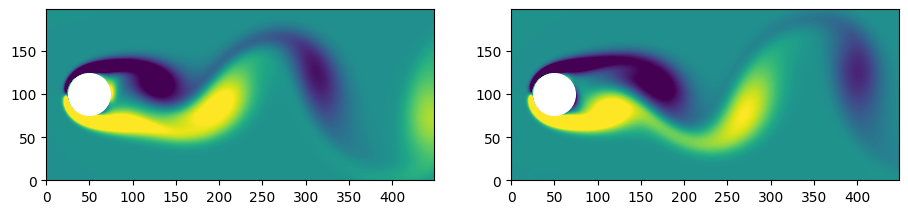

In [6]:

fig, ax= plt.subplots(1,2,figsize=(11, 4))

ax[0].contourf(np.real(np.reshape(X[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax[0].scatter(50,100,900,color='white', zorder=2) # draw cylinder
ax[0].set_aspect('equal')

ax[1].contourf(np.real(np.reshape(X[:,10],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax[1].scatter(50,100,900,color='white', zorder=2) # draw cylinder
ax[1].set_aspect('equal')

In [7]:
### get two views of the data matrix offset by one time step
X1 = np.matrix(X[:, 0:-1])
X2 = np.matrix(X[:, 1:])


In [8]:
### Constants 
r = 41 #DMD rank
dt = T*0.001




## Assumption of HODMD

The **Higher Order Dynamic Mode Decomposition (HODMD)** extends standard DMD by incorporating a **delay embedding**, which allows for better detection of multiple frequencies and more robustness in noisy or nonlinear systems.

Instead of assuming a direct relation $ \mathbf{x}_{i+1} = A\mathbf{x}_i $, we assume that the dynamics are governed by a linear operator acting on a **delay-embedded state vector**:

$$
\mathbf{z}_{i+1} = A_d \mathbf{z}_i
$$

where $ \mathbf{z}_i = [\mathbf{x}_i, \mathbf{x}_{i+1}, \ldots, \mathbf{x}_{i+d-1}]^\top $ is the delay-embedded state vector of dimension $ Md $, and $ d $ is the delay parameter.

This implies:

$$
\mathcal{X}_{d+1}^{N} = A_d \mathcal{X}_{1}^{N-d}
$$

where $ \mathcal{X}_{1}^{N-d} $ and $ \mathcal{X}_{d+1}^{N} $ are delay-embedded matrices constructed from $ X $.

## Problems with Standard DMD

Standard DMD may fail when:
1. The system has **multiple dominant frequencies**
2. The system is affected by **noise**
3. The dynamics are **nonlinear**

HODMD addresses these issues by using delay embedding, allowing us to:
- Extract **multiple frequencies**
- Improve **accuracy and robustness**
- Better model complex systems

## Efficient HODMD Algorithm

### Step-by-step procedure:

#### 1. Build Delay-Embedded Matrices

Given the original data matrix $ X \in \mathbb{R}^{M \times N} $, construct the delay-embedded matrices:

$$
\mathcal{X}_1 = 
\begin{bmatrix}
\mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_{N-d} \\
\mathbf{x}_2 & \mathbf{x}_3 & \cdots & \mathbf{x}_{N-d+1} \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{x}_d & \mathbf{x}_{d+1} & \cdots & \mathbf{x}_N
\end{bmatrix}
\in \mathbb{R}^{Md \times N - d + 1}
$$

Split into two parts:

$$
\mathcal{X}_1 = \text{columns } 1 \text{ to } N - d,\quad \mathcal{X}_2 = \text{columns } 2 \text{ to } N - d + 1
$$
#### 2. Perform SVD on $ \mathcal{X}_1 $

Compute the singular value decomposition:

$$
\mathcal{X}_1 = U \Sigma V^*
$$

Optionally truncate to rank $ r $:

$$
U_r = U[:, :r],\quad \Sigma_r = \text{diag}(\Sigma[:r]),\quad V_r = V[:, :r]
$$

#### 3. Compute Reduced Operator

Project the dynamics onto the low-rank subspace:

$$
\hat{A} = U_r^* \mathcal{X}_2 V_r \Sigma_r^{-1} \in \mathbb{C}^{r \times r}
$$

#### 4. Eigen-decomposition of $ \hat{A} $

Solve the eigenvalue problem:

$$
\hat{A} W = W \Lambda
$$

Where:
- $ \Lambda = \text{diag}(\lambda_1, ..., \lambda_r) $: eigenvalues (complex)
- $ W = [\mathbf{w}_1, ..., \mathbf{w}_r] $: eigenvectors

#### 5. Compute Full-Space DMD Modes

Reconstruct the DMD modes in the full space:

$$
\Phi = U_r W \in \mathbb{C}^{Md \times r}
$$

To map back to the original space:

$$
\phi_m^{(original)} = \frac{1}{d} \sum_{k=1}^d \phi_m^{(k)}
$$

Where $ \phi_m^{(k)} $ is the $ k $-th block of $ \Phi \mathbf{e}_m $, corresponding to the $ k $-th delay component.

#### 6. Reconstruct Time Series

Using the initial amplitude coefficients $ b $, computed via least squares:

$$
b = \arg\min_{\mathbf{b}} \left\| \Phi \mathbf{b} - \mathcal{X}_1[:, 0] \right\|
$$

Then the solution is:

$$
\mathbf{x}(t_i) = \sum_{m=1}^r b_m \phi_m e^{(\delta_m + i\omega_m)(i-1)\Delta t}
$$

Where:
- $ \log(\lambda_m) = (\delta_m + i\omega_m)\Delta t $
- $ \phi_m $: spatial mode
- $ b_m $: amplitude coefficient